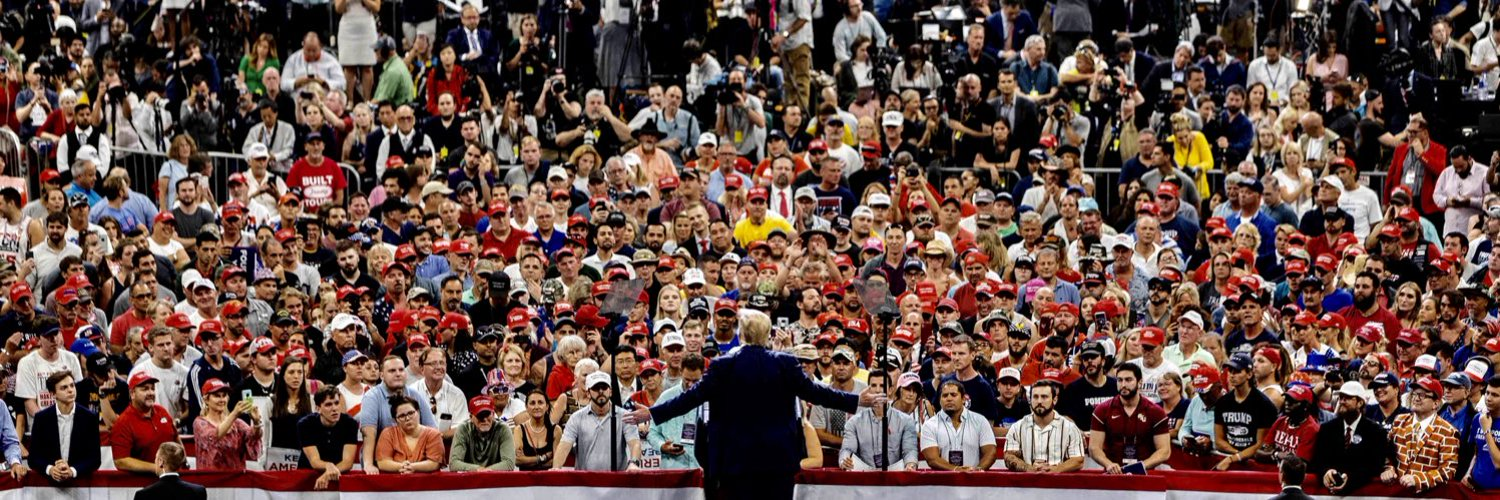

In [48]:
from IPython.display import Image
Image(filename='djt-twitterheader.jpeg') 

Source: [Header photo of Donald Trump's Twitter account](https://twitter.com/realDonaldTrump/header_photo)

## Introduction

Out of all the social media platforms in operation today, Twitter is potentially the best at being able to quickly find out what's happening in the world. A constant stream of once 140, but recently 280-character messages show what people think about sports, entertainment, politics, and more. At least within the context of the U.S.A., Twitter has been used increasingly in the past few years by politicians to give the public an idea of what actually goes on in government --- however opinionated their statements may seem. With that in mind, there is likely no Twitter account followed more closely today than that of our very own 45th President, Donald Trump. 

Trump's timeline provides for a relatively public view of how he aims to run the country and convey the office of the presidency --- as it should. Regardless of what he says (good or bad), CNN, Fox News, the Washington Post, and other news organizations spend considerable effort giving his tweets attention and debating the resulting impact on the country. It is no secret that President Trump is a Republican and wastes no time speaking out against celebrities, congressmen, senators, governors, aspiring candidates, and others on the other side of political aisle. It is also fairly obvious to see that President Trump's tweets grab headlines and that he rushes to defend himself on the platform in the face of questionable decisions or damaging legal investigations.

This notebook will attempt to go through the entirety of Donald Trump's Twitter timeline and provide insights into how he uses the platform. At the end, just for fun, there will also be a generator that uses a pre-trained language model to construct new tweets of Trump's likeness.   

## Cleanup & First Insights

In [1]:
import pandas as pd
import os
import time 
import re
from datetime import datetime

import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

windows_path = '/Users/Aniruddha/Desktop/projects/trump/djt-11032019.csv'
mac_path = '/Users/aniruddhaprabhu/Library/Mobile Documents/com~apple~CloudDocs/Data/trump/csv/djt-11032019.csv'
tweets = pd.read_csv(mac_path)
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Don’t miss this show! https://t.co/EhY8CNAUqP,Mon Nov 04 01:08:27 +0000 2019,4943,15904,False,1191160243784433665
1,Twitter for iPhone,False stories are being reported that a few Re...,Mon Nov 04 00:59:45 +0000 2019,9725,37358,False,1191158055397969920
2,Twitter for iPhone,....should give their own transcripts of the i...,Mon Nov 04 00:48:55 +0000 2019,6717,23427,False,1191155326743195648
3,Twitter for iPhone,"If Shifty Adam Schiff, who is a corrupt politi...",Mon Nov 04 00:48:51 +0000 2019,8344,28369,False,1191155312084082688
4,Twitter for iPhone,https://t.co/3O0ABd3HGt,Sun Nov 03 22:24:47 +0000 2019,9543,26444,False,1191119056910372864


In [2]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28591 entries, 0 to 28590
Data columns (total 7 columns):
source            28591 non-null object
text              28591 non-null object
created_at        28591 non-null object
retweet_count     28591 non-null int64
favorite_count    28591 non-null int64
is_retweet        28533 non-null object
id_str            28591 non-null int64
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [3]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%a %b %d %H:%M:%S %z %Y')
tweets['created_at'].head()

0   2019-11-04 01:08:27+00:00
1   2019-11-04 00:59:45+00:00
2   2019-11-04 00:48:55+00:00
3   2019-11-04 00:48:51+00:00
4   2019-11-03 22:24:47+00:00
Name: created_at, dtype: datetime64[ns, UTC]

The times indicated above are from UTC+0000/Greenwich Median Time/U.K Time. Since Donald Trump resides in the White House and conducts his business around D.C./New York/Florida, it is best to convert those times to Eastern Standard Time/UTC-0500 as a frame of reference for when he tweets.

In [4]:
tweets['created_at'] = tweets['created_at'].dt.tz_convert('US/Eastern')
tweets['created_at'].head()

0   2019-11-03 20:08:27-05:00
1   2019-11-03 19:59:45-05:00
2   2019-11-03 19:48:55-05:00
3   2019-11-03 19:48:51-05:00
4   2019-11-03 17:24:47-05:00
Name: created_at, dtype: datetime64[ns, US/Eastern]

Since this notebook aims to examine tweets themselves and not the content of any external sources, the URLs need to be removed from the text. For instance, Mr. Trump occasionally makes tweets that include direct links to external media or tweets from other accounts, which are irrelevent to what he actually types out. Additionally, some of his tweets include only the links & nothing else, so those tweets need to be deleted entirely from the dataframe.  

In [5]:
for index, row in tweets.iterrows():
    tweets['text'][index] = ' '.join([word for word in tweets['text'][index].split() if 'http' not in word])
    
tweets.drop(tweets[tweets['text'] == ''].index, inplace=True)
tweets.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Don’t miss this show!,2019-11-03 20:08:27-05:00,4943,15904,False,1191160243784433665
1,Twitter for iPhone,False stories are being reported that a few Re...,2019-11-03 19:59:45-05:00,9725,37358,False,1191158055397969920
2,Twitter for iPhone,....should give their own transcripts of the i...,2019-11-03 19:48:55-05:00,6717,23427,False,1191155326743195648
3,Twitter for iPhone,"If Shifty Adam Schiff, who is a corrupt politi...",2019-11-03 19:48:51-05:00,8344,28369,False,1191155312084082688
5,Twitter for iPhone,Virginia has the best Unemployment and Economi...,2019-11-03 15:23:15-05:00,13834,49105,False,1191088472997744640


In [6]:
mtweet_starting = tweets[tweets['text'].str.endswith('..') & ~(tweets['text'].str.startswith('..'))].index
mtweet_middle = tweets[tweets['text'].str.startswith('..') & tweets['text'].str.endswith('..')].index
mtweet_ending = tweets[tweets['text'].str.startswith('..') & ~(tweets['text'].str.endswith('..'))].index

tweets.drop(mtweet_starting, inplace=True)
tweets.drop(mtweet_middle, inplace=True)
tweets.drop(mtweet_ending, inplace=True)
len(tweets)

26107

## Tweet Statistics

In [7]:
sources = tweets['source'].value_counts().to_frame()

fig = go.Figure(data=[go.Pie(labels=sources.index.values, values=sources['source'])])
fig.update_layout(
    title_text="Tweet Sources for Donald Trump")
fig.show()

In [8]:
days = tweets['created_at'].dt.day_name().value_counts().to_frame()

fig = go.Figure(data=[go.Bar(x=days.index.values, y=days['created_at'])])
fig.update_layout(
    title_text="Weekly Tweet Distribution of Donald Trump", 
    xaxis=dict(title='Day of Week'),
    yaxis=dict(title='Number of Tweets'))
fig.show()

It's pretty obvious to see here that Mr. Trump tweets pretty evenly on the weekdays, but tends to cut down on the weekends. Now on to the time of day...

In [9]:
hour_of_days = tweets['created_at'].dt.hour.value_counts().to_frame()

fig = go.Figure(data=[go.Bar(x=hour_of_days.index.values, y=hour_of_days['created_at'])])
fig.update_layout(
    title_text="Intra-day Tweet Distribution of Donald Trump", 
    xaxis=dict(title='Hour of Day (24-HR time)'),
    yaxis=dict(title='Number of Tweets'))
fig.show()

In [10]:
tweets['total_engagements'] = tweets['retweet_count'] + tweets['favorite_count']
largest = tweets.nlargest(10, 'total_engagements')[['text','created_at', 'total_engagements']]

for index, row in largest.iterrows():
    print('Text:', row['text'] + '\n' + 
          'Created At:', str(row['created_at']) + '\n' +
          'Total Engagements:', row['total_engagements'], '\n')

Text: A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
Created At: 2019-08-02 13:41:30-04:00
Total Engagements: 1131177 

Text: #FraudNewsCNN #FNN
Created At: 2017-07-02 09:21:42-04:00
Total Engagements: 974628 

Text: Just spoke to @KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minister of Sweden to see what we can do about helping A$AP Rocky. So many people would like to see this quickly resolved!
Created At: 2019-07-19 16:01:47-04:00
Total Engagements: 944753 

Text: TODAY WE MAKE AMERICA GREAT AGAIN!
Created At: 2016-11-08 06:43:14-05:00
Total Engagements: 918089 

Text: Why would Kim Jong-un insult me by calling me "old," when I would NEVER call him "short and fat?" Oh well, I try so hard to be his friend - and maybe someday that will happen!
Created At: 2017-11-11 19:48:01-05:00
Total Engagements: 888993 

Text: Such a beautiful and important evening! T

## Content Analysis

The next section of this notebook will attempt to quantify this by looking deeper into the content of the tweets. This would include areas such as how much Donald Trump tweets about something and his perception of it (positive or negative).

In [11]:
import cufflinks as cf
import plotly.tools as tls
cf.go_offline()

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('vader_lexicon')

import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sw = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer()

def clean_tweet(txt):
    txt = txt.lower()
    txt = [word.strip(string.punctuation) for word in txt.split(' ')]
    txt = ' '.join(txt)
    
    return txt

def get_sentiment(poly):
    if poly >= 0.05:
        return 'positive'
    elif poly <= -0.05: 
        return 'negative' 
    elif poly > -0.05 and poly < 0.05:
        return 'neutral'

tweets['text_clean'] = tweets['text'].apply(lambda tweet: clean_tweet(tweet))
tweets['polarity'] = tweets['text'].apply(lambda tweet: sid.polarity_scores(tweet)['compound'])
tweets['sentiment'] = tweets['polarity'].apply(lambda polarity: get_sentiment(polarity))

obama_tweets = tweets[tweets['text_clean'].str.contains('obama')]
obama_tweets.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aniruddhaprabhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aniruddhaprabhu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,total_engagements,text_clean,polarity,sentiment
232,Twitter for iPhone,"Pelosi is now leading a delegation of 9, inclu...",2019-10-20 16:28:28-04:00,30715,106243,False,1186016354572353536,136958,pelosi is now leading a delegation of 9 includ...,-0.2519,negative
260,Twitter for iPhone,"Susan Rice, who was a disaster to President Ob...",2019-10-18 22:59:13-04:00,34386,129925,False,1185389914470473729,164311,susan rice who was a disaster to president oba...,-0.8977,negative
292,Twitter for iPhone,"“About 500,000 human beings were killed in Syr...",2019-10-17 00:29:31-04:00,43546,137839,False,1184687862090010624,181385,"“about 500,000 human beings were killed in syr...",-0.9216,negative
512,Twitter for iPhone,"“Incomes much higher under Trump than Bush, Ob...",2019-10-07 09:38:21-04:00,14736,58259,False,1181202101327843329,72995,“incomes much higher under trump than bush oba...,0.4926,positive
528,Twitter for iPhone,Democrat lawyer is same for both Whistleblower...,2019-10-06 18:03:03-04:00,19250,65478,False,1180966726227386368,84728,democrat lawyer is same for both whistleblower...,0.1260,positive


In [49]:
sentiments = obama_tweets['sentiment'].value_counts().to_frame()

fig = go.Figure(data=[go.Pie(labels=sentiments.index.values, values=sentiments['sentiment'])])
fig.update_layout(
    title_text="Sentiment of Trump's Tweets mentioning Obama")
fig.show()

The tweets that mention former president Barack Obama appear to be positive 34.8% of the time --- an odd figure given Trump's public opinion of him. However, there is a noticeable plurality of negative sentiment.

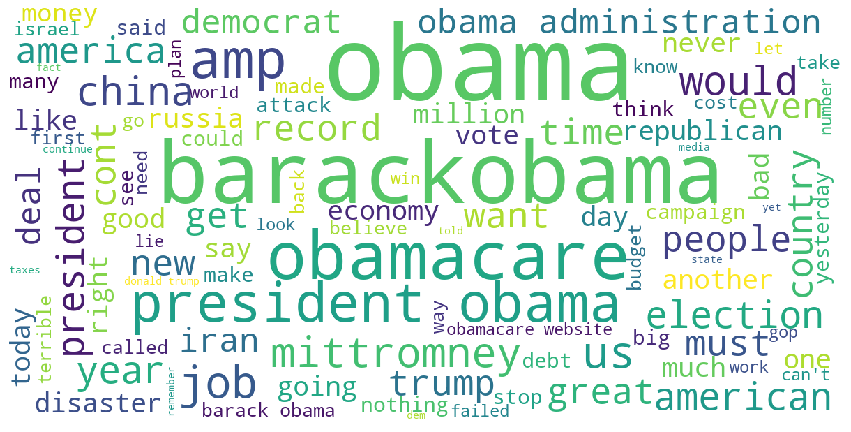

In [13]:
def show_wordcloud(data, column):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 50, 
        scale = 3,
        random_state = 42, 
        stopwords = sw
    ).generate(" ".join([i for i in data[column]]))

    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(obama_tweets, 'text_clean')

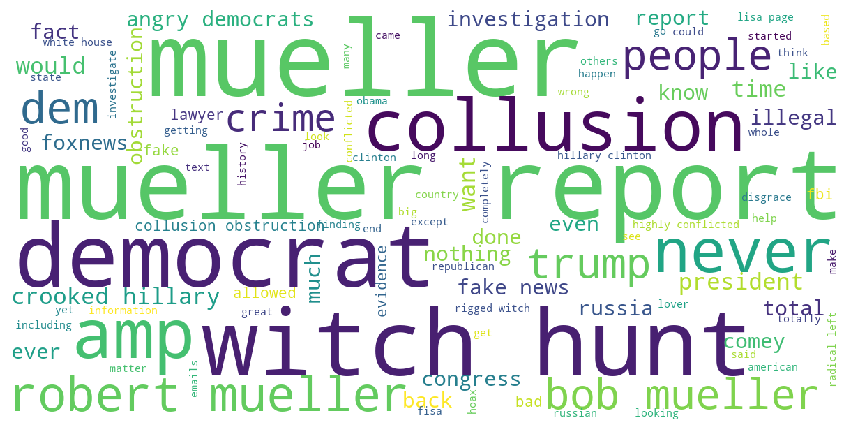

In [14]:
mueller_tweets = tweets[tweets['text_clean'].str.contains('mueller')]
show_wordcloud(mueller_tweets, 'text_clean')

As expected, the phrases 'witch hunt' and 'collusion' are fairly large here since these are Trump's go-to attacks on the Robert Mueller's investigation into both his & Russia's involvement in the 2016 election.

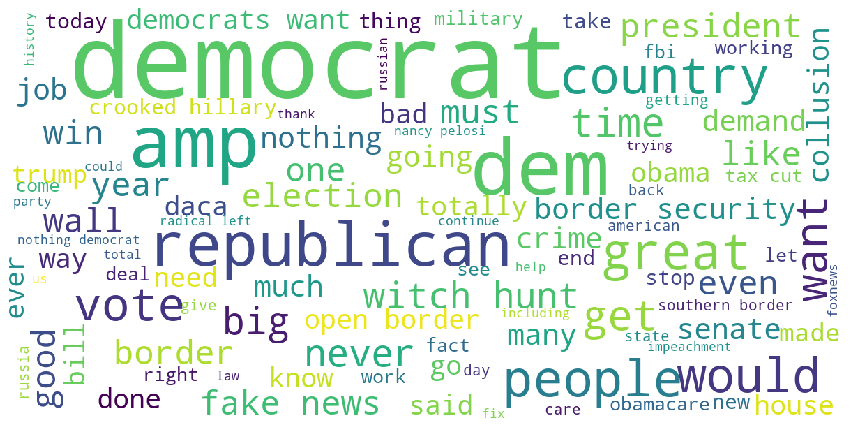

In [15]:
dem_tweets = tweets[tweets['text_clean'].str.contains('dem')]
show_wordcloud(dem_tweets, 'text_clean')

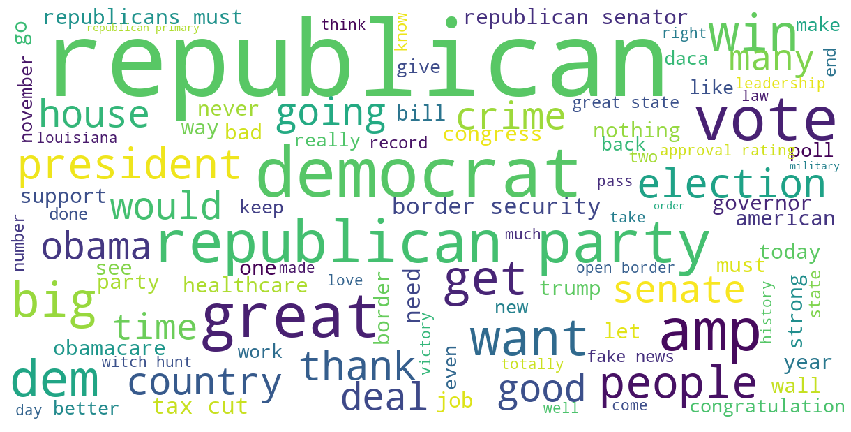

In [16]:
gop_tweets = tweets[tweets['text_clean'].str.contains('republican')]
show_wordcloud(gop_tweets, 'text_clean')

## Just for Fun: Tweet Generator

In [19]:
from fastai import *
from fastai.text import *
from sklearn.model_selection import train_test_split

train_tweets, test_tweets = train_test_split(tweets, test_size=0.1, random_state=7)
models_path = '/Users/aniruddhaprabhu/Desktop/Data/trump'

lmdb = TextLMDataBunch.from_df(path=models_path, train_df=train_tweets, valid_df=test_tweets, text_cols='text')
lml = language_model_learner(data=lmdb, arch=AWD_LSTM, pretrained=True, drop_mult=0.5)

In [20]:
lml.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


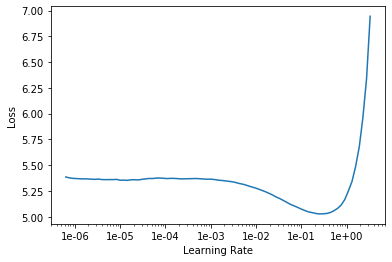

In [21]:
lml.recorder.plot()

In [22]:
lml.fit(epochs=15, lr=5e-2, wd=1e-7)

epoch,train_loss,valid_loss,accuracy,time
0,4.339390,3.900458,0.309112,13:04
1,3.991690,3.828108,0.319301,11:27
2,3.829556,3.817760,0.320733,12:10
3,3.751114,3.818663,0.323753,12:18
4,3.682716,3.835989,0.323687,13:53
5,3.654940,3.840755,0.323792,14:43


KeyboardInterrupt: 

In [43]:
generated_tweets = []

for twt in range(50):
    sample = lml.predict(text='', n_words=50, temperature=0.7)
    sample_cleaned = [sentence for sentence in sample.split('xxbos') if sentence not in ['', ' ']]
    generated_tweets.append(sample_cleaned[0])
    
generated_tweets

[' Via @AP : “ Presidential Proclamation : Pay attention to Donald Trump Answers Big ” ',
 ' Just arrived in West Virginia , where i was a tremendous player and president ! ',
 " Via @newsmax_media by Cathy Burke : “ Donald Trump : More Donald ' Donald Trump ' ” ",
 ' Sleepy Eyes Chuck Todd , an agent who has been fired , is now talking about his @foxnews endorsement ! ',
 ' Re - election . He can pick the call in the venture to impress . i am in Iowa . The Dems are too strong . ',
 ' Governor @scottwalker -- Governor Kenneth Mapp of the Wisconsin “ Green Party ” , a longtime President of Mexico , stated that the Steel Industry is our enemy . Our Country has been divided and divided !',
 ' Thank you Louisville , Iowa ! # makeamericagreatagain # Trump2016 ',
 ' Thank you West Virginia ! ',
 " Entrepreneurs : Know exactly what you 're doing . Be able to be flexible . It 's the best country anywhere ! Be ready . ",
 ' Thank you Iowa ! ',
 ' Peter Schweizer , author , author , author , aut

In [44]:
num_words = 0

for t in tweets['text_clean']:
    num_words += len(t.split(' '))
    
num_words / len(tweets)

19.075420385337267

## Concluding Thoughts
From just the provided data, it was fairly easy to get an idea of Trump's general tweeting behavior. As expected, President Trump feels negatively towards subjects that involve Democrats and positive towards subjects that involve the GOP/Republicans. Despite the language model only giving a baseline accuracy of just over 30%, the resulting generated tweets do in fact seem like something that Trump would put out, grammar and punctuation mistakes notwithstanding.

For further investigation, it would have been nice to have data regarding the number of replies/comments to his tweets. Even though he rarely goes back-and-forth with other users on the platform, this could give a better understanding of how many people interact with him. Additionally, a dataset of Trump's follower counts would help get a sense of his popularity over time and match growth spikes to various news-worthy events.